<a href="https://colab.research.google.com/github/TumSim/python_data_analytics1/blob/main/Python_Luokittelu_ja_regressio_tehtava4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

#jakaa datan opetus ja testi dataan
from sklearn.model_selection import train_test_split

#Mallit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor,GradientBoostingRegressor
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

#Sekaannusmatriisi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Luokittelumalli**

Tuodaan data käytettäväksi.


In [3]:
df = pd.read_excel('KidCreative.xlsx')
df

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,669,0,27000,1,0,0,0,0,0,6,0,1,1,1,1,1,0,0
669,670,0,3000,1,0,0,0,0,0,11,0,1,0,1,0,1,0,0
670,671,1,75000,1,1,0,1,0,0,52,0,0,1,1,1,1,0,0
671,672,1,51000,1,1,0,1,0,0,10,1,1,1,1,1,1,0,0


Poistetaan Obs No. datasta.


In [4]:
df = df.drop(columns=['Obs No.'])
df

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0,27000,1,0,0,0,0,0,6,0,1,1,1,1,1,0,0
669,0,3000,1,0,0,0,0,0,11,0,1,0,1,0,1,0,0
670,1,75000,1,1,0,1,0,0,52,0,0,1,1,1,1,0,0
671,1,51000,1,1,0,1,0,0,10,1,1,1,1,1,1,0,0


Tarkastellaan hieman muuttujan jakaumaa.

In [5]:
df['Buy'].value_counts()

0    548
1    125
Name: Buy, dtype: int64

Tarkastellaan dataa ja muuttujien yhteyksiä

<Axes: >

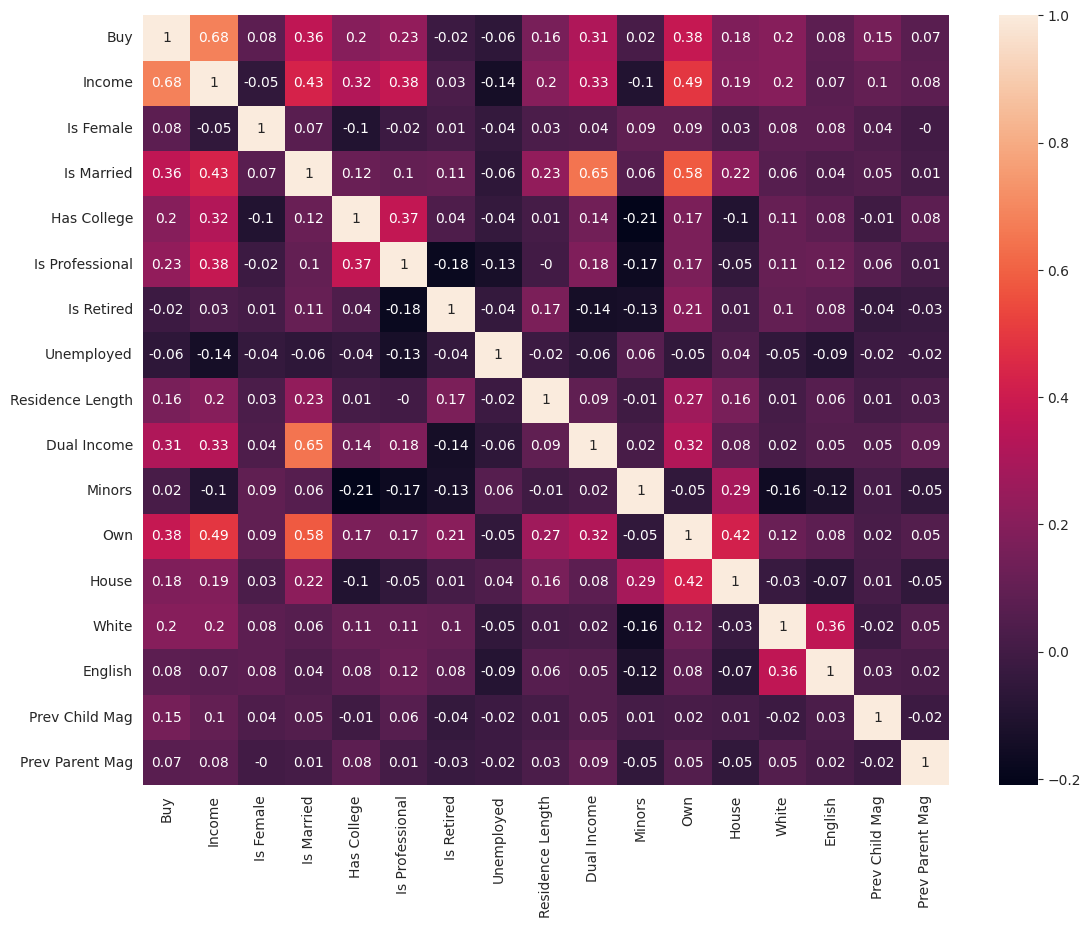

In [6]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr().round(2), annot = True)

In [7]:
print(df.columns)

Index(['Buy', 'Income', 'Is Female', 'Is Married', 'Has College',
       'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length',
       'Dual Income', 'Minors', 'Own', 'House', 'White', 'English',
       'Prev Child Mag', 'Prev Parent Mag'],
      dtype='object')


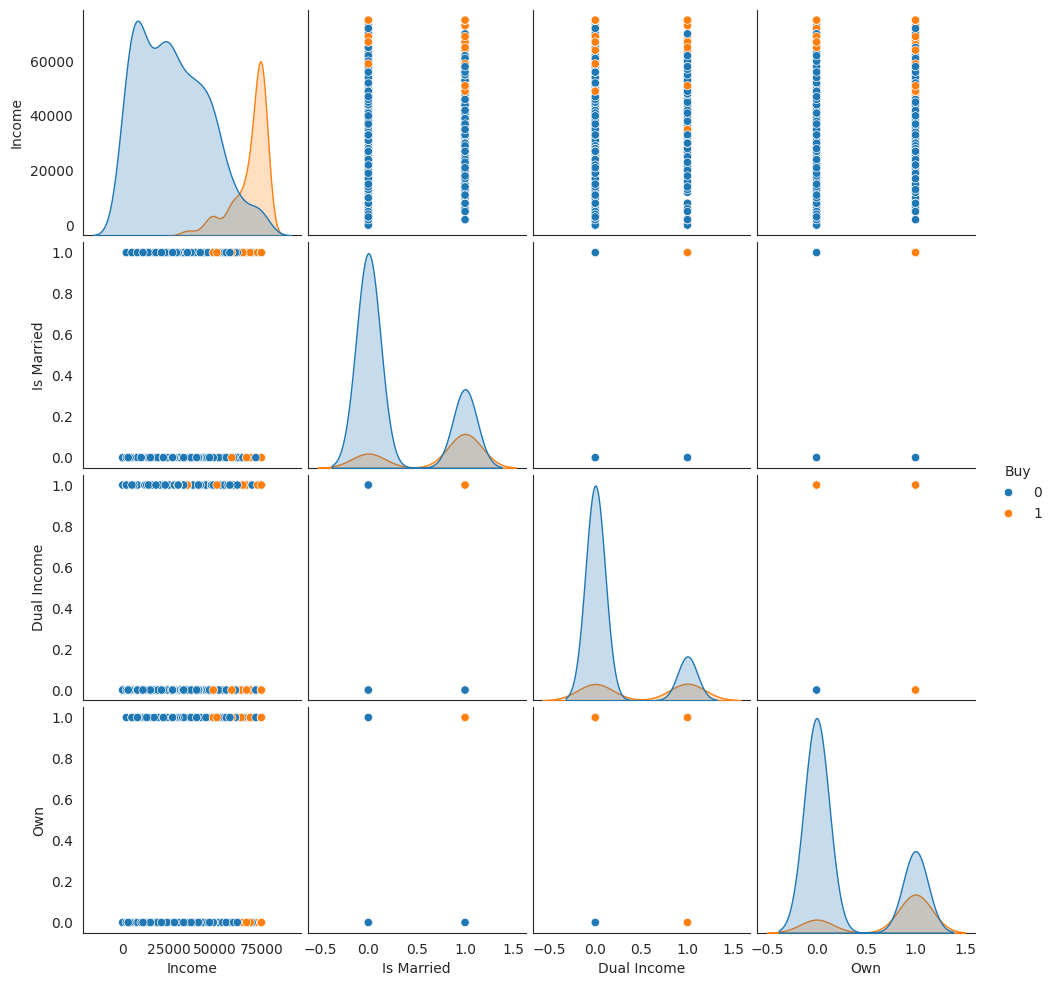

In [8]:
sns.pairplot(df[['Buy',"Income", "Is Married", "Dual Income", "Own" ]], hue = 'Buy')

Pairplotista hieman hankala hahmottaa jakaumaa, joten heatmap korrelaatiot ovat enemmänkin avuksi tässä tilanteessa.

**Mallien sovittaminen**

In [9]:
X = df[["Income", "Dual Income","Is Married","Own"]]

y = df["Buy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [10]:
lrc = LogisticRegression(random_state=2)
lrc.fit(X_train, y_train)

dtc = DecisionTreeClassifier(max_depth=4, random_state=2)
dtc.fit(X_train, y_train)

rfc = RandomForestClassifier(max_depth=4, random_state=2)
rfc.fit(X_train, y_train)

gbc = GradientBoostingClassifier(max_depth=4, random_state=2)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=2)

In [11]:
print('Ennusteiden tarkkuus opetusdatassa:')
print(f'Logistinen regressio {lrc.score(X_train, y_train):.3f}')
print(f'Päätöspuu {dtc.score(X_train, y_train):.3f}')
print(f'Satunnaismetsä {rfc.score(X_train, y_train):.3f}')
print(f'Gradienttitehostus {gbc.score(X_train, y_train):.3f}')

Ennusteiden tarkkuus opetusdatassa:
Logistinen regressio 0.933
Päätöspuu 0.940
Satunnaismetsä 0.946
Gradienttitehostus 0.966


In [12]:
print('Ennusteiden tarkkuus testidatassa:')
print(f'Logistinen regressio {lrc.score(X_test, y_test):.3f}')
print(f'Päätöspuu {dtc.score(X_test, y_test):.3f}')
print(f'Satunnaismetsä {rfc.score(X_test, y_test):.3f}')
print(f'Gradienttitehostus {gbc.score(X_test, y_test):.3f}')

Ennusteiden tarkkuus testidatassa:
Logistinen regressio 0.917
Päätöspuu 0.917
Satunnaismetsä 0.935
Gradienttitehostus 0.893


Tämä apuna mallin sovittamisessa. Pyritään löytää oikeat muuttujat parhaan ennusteen saamiseksi.

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


feature_importances = rfc.feature_importances_

# Tulosta tärkeysjärjestys
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

Income: 0.8190942125250991
Dual Income: 0.030780516307372992
Is Married: 0.07825943929813528
Own: 0.07186583186939272


Mallin sovittamisessa kyseiset muuttujat ja valittu max_depht tuovat parhaan tarkkuuden mallille.

**Tutkitaan malleja sekaannusmatriiseissa**

In [14]:
# Mallien laskemat ennusteet testidatalle (tarvitaan sekaannusmatriiseissa)
y_test_dtc = dtc.predict(X_test)
y_test_lrc = lrc.predict(X_test)
y_test_rfc = rfc.predict(X_test)
y_test_gbc = gbc.predict(X_test)

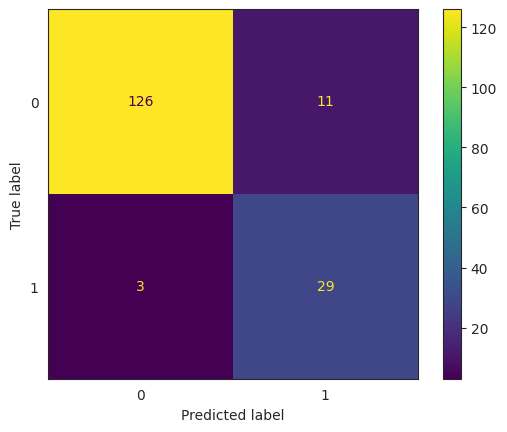

In [15]:
# Päätöspuu
cm = confusion_matrix(y_test, y_test_dtc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

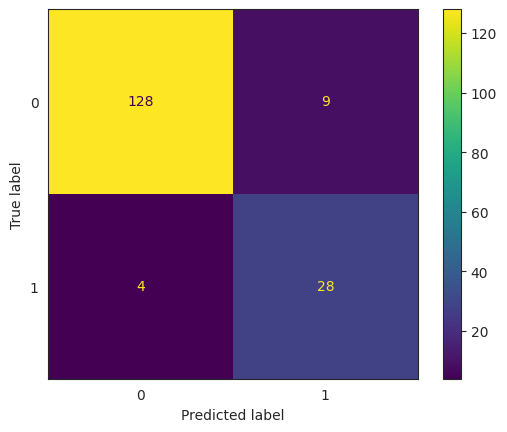

In [16]:
# Satunnaismetsä
cm = confusion_matrix(y_test, y_test_rfc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

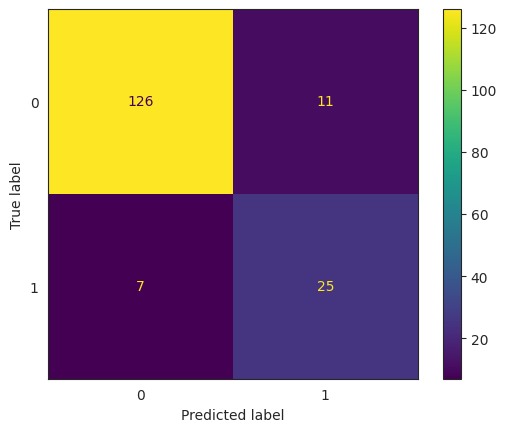

In [17]:
# Gradienttitehostus
cm = confusion_matrix(y_test, y_test_gbc)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Kaikki mallit ovat erittäin lähellä toisiaan.

Tietenkin riippuu siitä mitä mallilta halutaan. Tässä tapauksessa, jopa mielestäni päätöspuu toimii tilanteessa parhaiten tämän mallin kanssa.

Ostavien ennustus on parempi kuin toisilla malleilla.

### **Päätöspuu ennustaminen**

In [18]:
#X = df[["Income", "Dual Income","Is Married","Own"]]
# Data kahdelle uudelle henkilölle
Xnew = pd.DataFrame([[20000, 1, 1,1], [20000, 0, 0,0],[175000,1,1,0],[25000, 0, 0, 0]],
                    columns = ["Income", "Dual Income", "Is Married", "Own"])
Xnew

,Income,Dual Income,Is Married,Own
0,20000,1,1,1
1,20000,0,0,0
2,175000,1,1,0
3,25000,0,0,0


In [19]:
ennuste = dtc.predict(Xnew)
todnak = dtc.predict_proba(Xnew).round(2)
Xnew['ennuste'] = ennuste
Xnew[['Buy 0', 'Buy 1']] = todnak
Xnew

,Income,Dual Income,Is Married,Own,ennuste,Buy 0,Buy 1
0,20000,1,1,1,0,1.00,0.00
1,20000,0,0,0,0,1.00,0.00
2,175000,1,1,0,1,0.04,0.96
3,25000,0,0,0,0,1.00,0.00


### **Satunnaismetsä ennustaminen**

In [20]:
#X = df[["Income", "Dual Income","Is Married","Own"]]
# Data kahdelle uudelle henkilölle
Xnew1 = pd.DataFrame([[20000, 1, 1,1], [20000, 0, 0,0],[175000,1,1,0],[25000, 0, 0, 0]],
                    columns = ["Income", "Dual Income", "Is Married", "Own"])
Xnew1

,Income,Dual Income,Is Married,Own
0,20000,1,1,1
1,20000,0,0,0
2,175000,1,1,0
3,25000,0,0,0


In [21]:
ennuste1 = rfc.predict(Xnew1)
todnak1 = rfc.predict_proba(Xnew1).round(2)
Xnew1['ennuste'] = ennuste1
Xnew1[['Buy 0', 'Buy 1']] = todnak1
Xnew1

,Income,Dual Income,Is Married,Own,ennuste,Buy 0,Buy 1
0,20000,1,1,1,0,1.0,0.0
1,20000,0,0,0,0,1.0,0.0
2,175000,1,1,0,1,0.0,1.0
3,25000,0,0,0,0,1.0,0.0


Satunnaismetsä pystyy hieman tarkemmin antamaan ennusteen annetusta datasta.

# **Regressiomalli**

Tehdään funktio joka tekee mallin sovittamisen ja mallin arvioinnin.

In [22]:
def mallinna(malli):

   #sovitetaan malli
    malli.fit(X_train, y_train)

    # Selityskerroin opetusdatalle
    y_pred_train = malli.predict(X_train)
    R2_train_malli = malli.score(X_train, y_train)

    # Selityskerroin testidatalle
    y_pred_test = malli.predict(X_test)
    R2_test_malli = malli.score(X_test, y_test)

    # Selityskertoimien tulostus
    print(f'Opetusdatan selityskerroin {R2_train_malli:.3f}')
    print(f'Testidatan selityskerroin {R2_test_malli:.3f}')

    # Opetusdatan virhetermit kaaviona
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].set_title('Ennustevirheiden jakauma opetusdatassa')
    sns.histplot((y_train-y_pred_train), kde=True, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # toteutuneet ja ennustetut hajontakaaviona testidatalle
    ax[1].set_title('Toteutuneet ja ennustetut testidatassa')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('toteutunut')
    ax[1].set_ylabel('ennuste')

**Tuodaan tarkasteltava data käytettäväksi**

In [23]:
df1 = pd.read_excel('ENB2012_data.xlsx')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [24]:
df1

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [25]:
df1 = df1.drop(columns=['Y2'])
df1

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


**Tarkastellaan dataa hieman visuaalisesti**

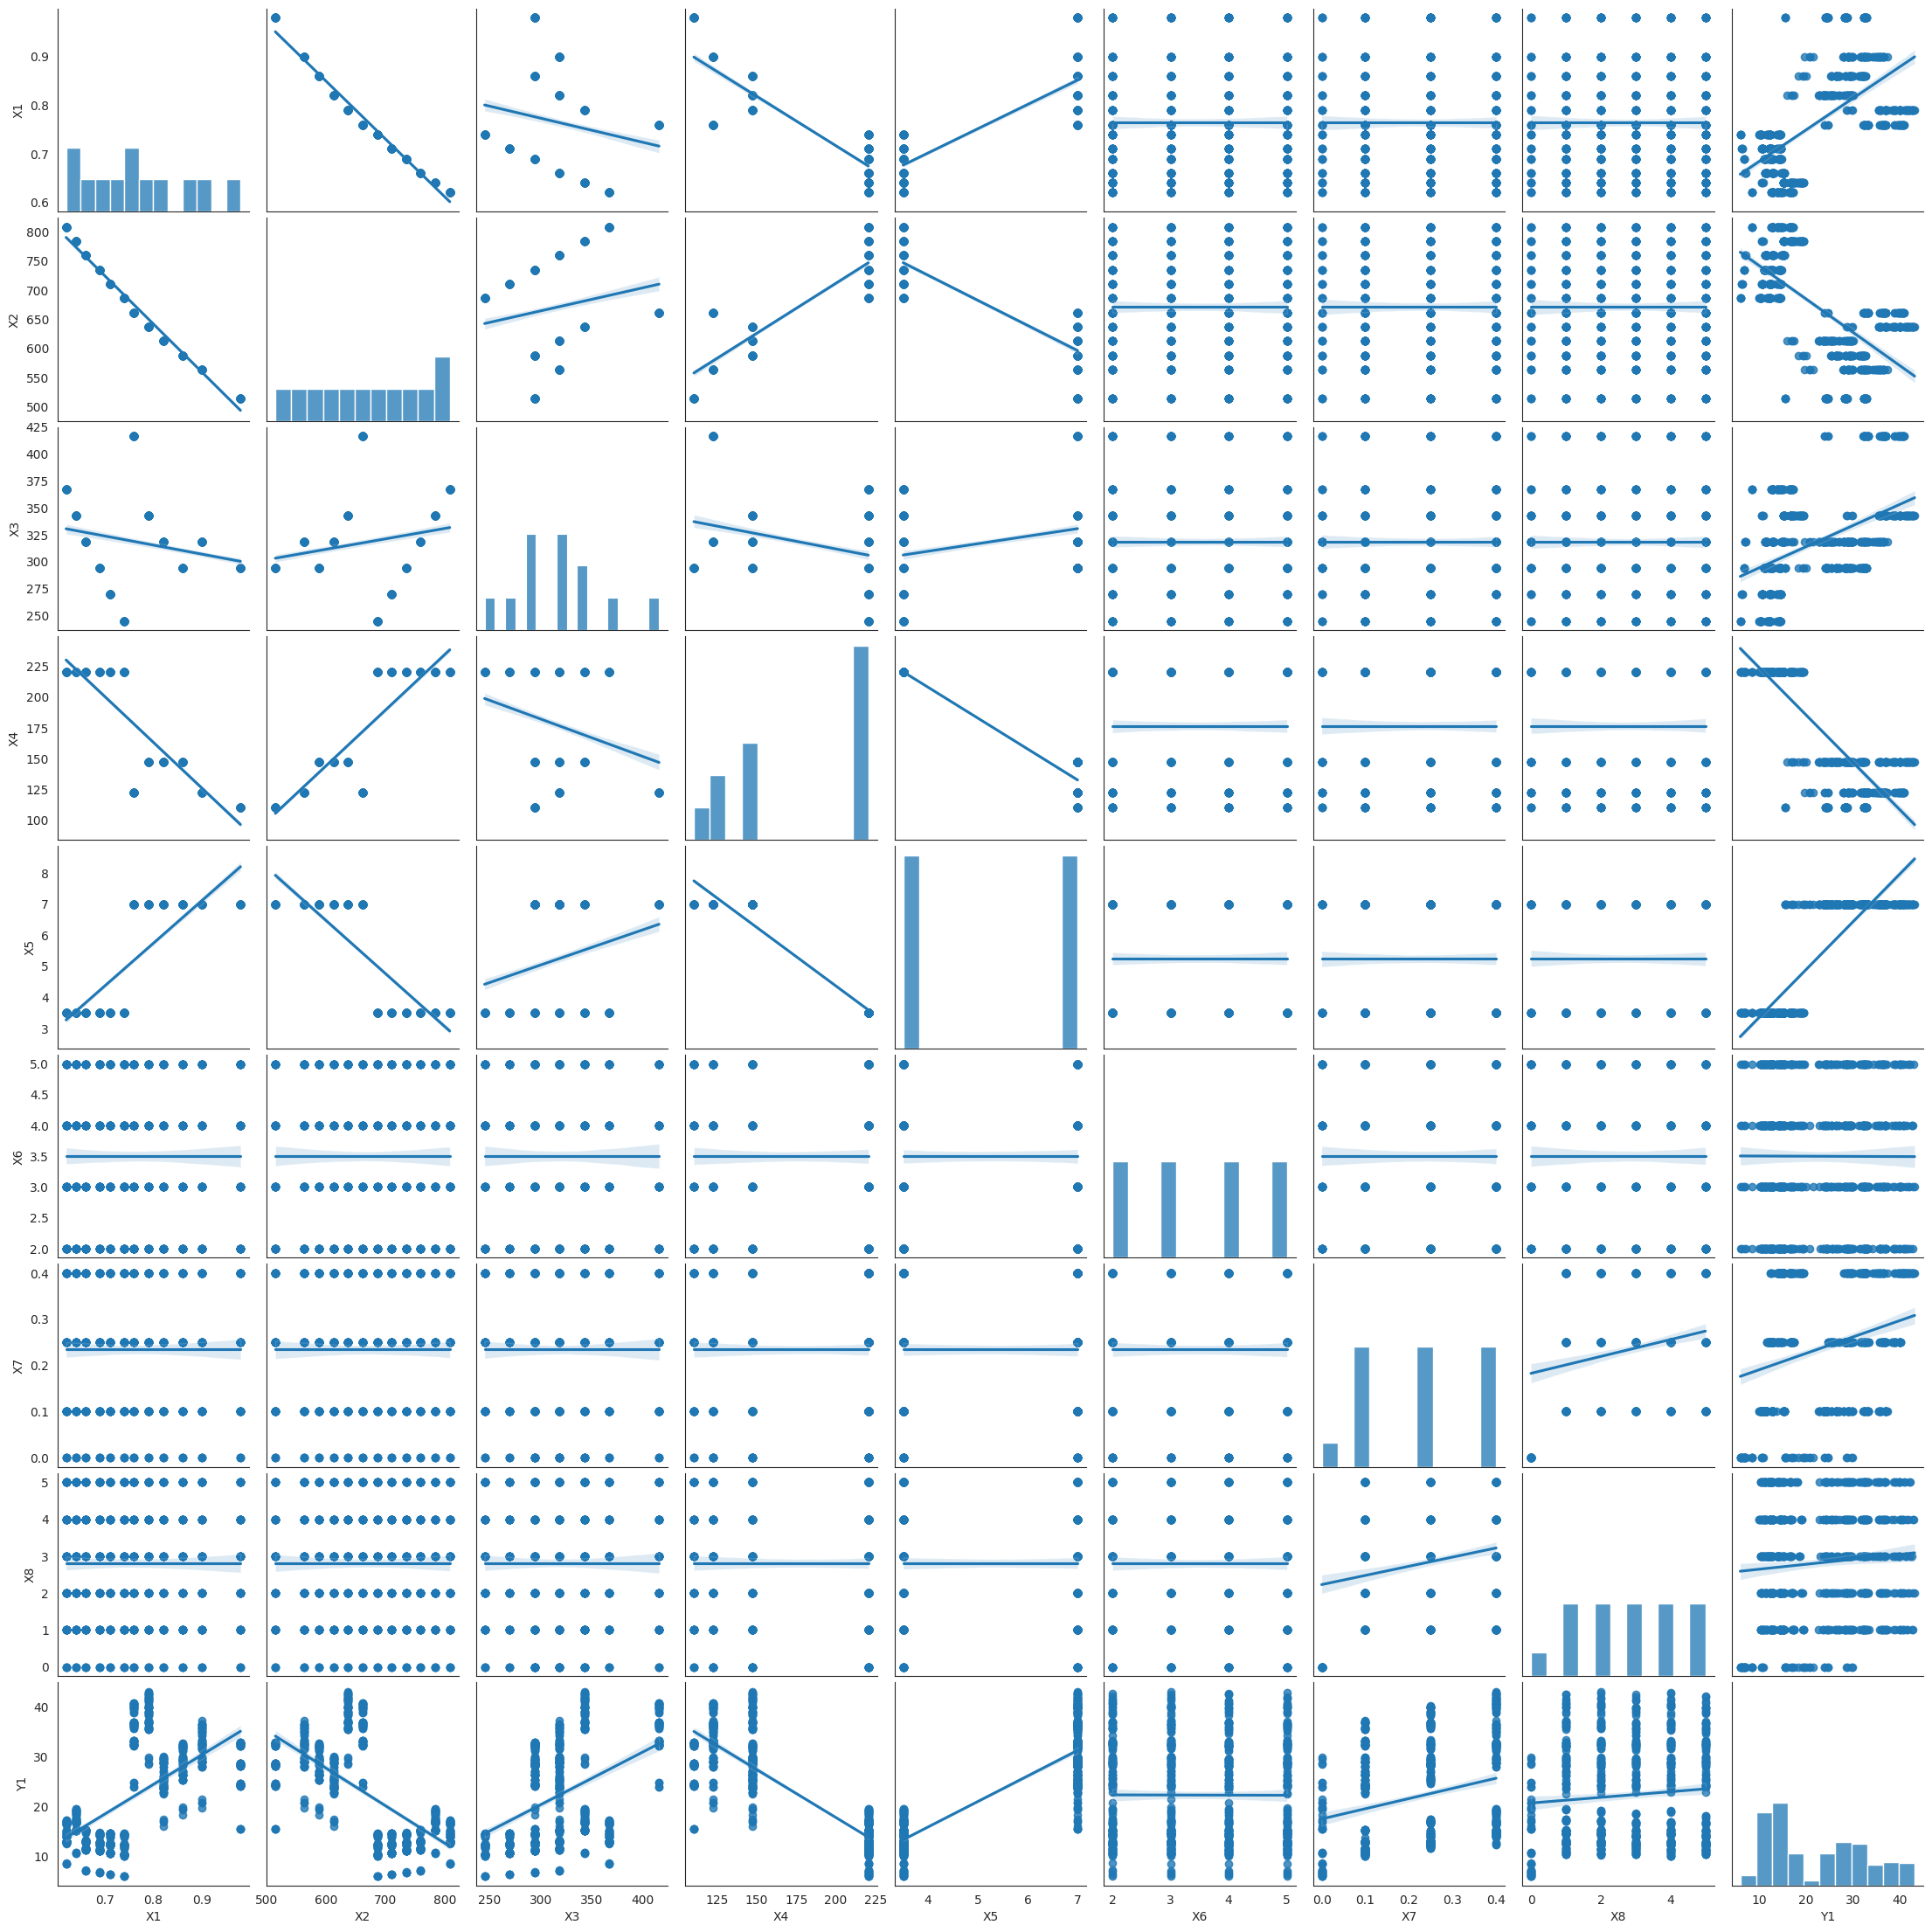

In [26]:
sns.pairplot(df1, kind = 'reg')

<Axes: >

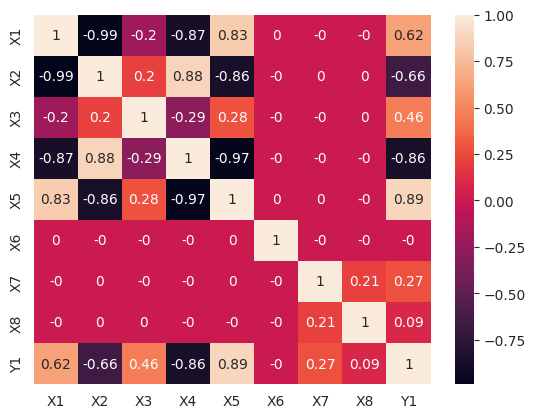

In [27]:
correlation_matrix = df1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Hajontakaaviolla voidaan nähdä riippuvuuksia, mutta tässä tapauksessa korrelaatiokertoimet auttaa tulkitsemisessa hyvinkin paljon, selittävien muuttujien valinnassa

Sovitetaan mallit

In [28]:
# Selittävät muuttujat
X = df1[["X1", "X2","X3", "X4", "X5","X7"]]

# Kohdemuuttuja
y = df1['Y1']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

Opetusdatan selityskerroin 0.917
Testidatan selityskerroin 0.908


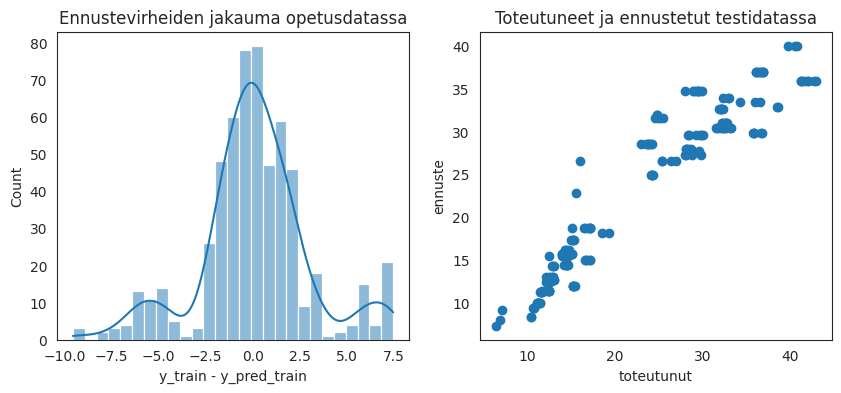

In [30]:
#Lineaarinen regressio
malli = LinearRegression()

# Tässä hyödynnän aiemmin määriteltyä mallinna-funktiota
mallinna(malli)

Opetusdatan selityskerroin 0.998
Testidatan selityskerroin 0.998


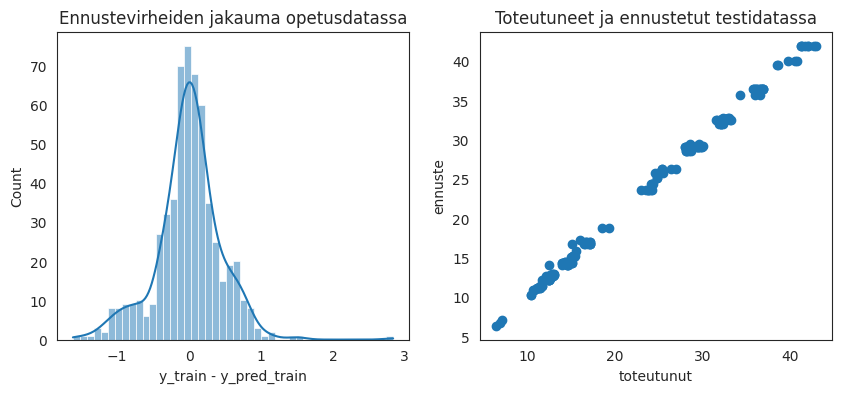

In [31]:
#Satunnaismetsä
malli = RandomForestRegressor()
mallinna(malli)

Opetusdatan selityskerroin 0.998
Testidatan selityskerroin 0.998


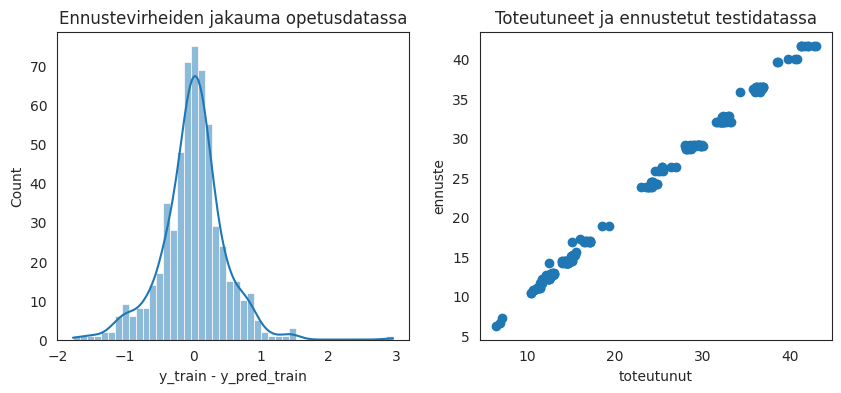

In [32]:
#Gradienttitehostus
malli = GradientBoostingRegressor()
mallinna(malli)

Lineaarinen regressiomalli ei tässä tapauksessa tuottanut hyvää mallia. Suuri jakauma virhetermeissä ja pisteet eivät ovat hyvin hajanaiset kaaviossa.

Satunnaismetsä ja Gradienttitehostus ovat kohtuullisen samanlaisia tässä tapauksessa.

Molempien selityskertoimet ovat täysin samat. Toisaalta gradienttitehostuksen virhejakauma hieman suurempi. Lineaarinen ennuste molemmissa hyvin samanlainen.

Virhetermit ovat jakautuneet hieman symmentrisemmin Gradienttitehostuksessa kuin satunnaismetsässä.